In [85]:
import math

import networkx as nx
import numpy as np
from IPython.display import Image, display_png
from networkx.readwrite import json_graph

In [117]:
class Tree:
    def __init__(self, branching, title="Title"):
        self.title = title
        self.height = len(branching)
        self.G = nx.DiGraph()
        self.append_node()
        for i in branching:
            leafs = [node for node in self.G if self.is_leaf(node)]
            for node in leafs:
                for j in range(i):
                    self.append_node(node)

    def is_leaf(self, node):
        return self.G.degree(node) == 0 or (node != 0 and self.G.degree(node) == 1)

    def append_node(self, parent=None):
        n = self.G.number_of_nodes()
        self.G.add_node(n)
        if parent is not None:
            self.G.add_edge(parent, n)

    def label(self, labels=[]):
        while len(labels) < self.G.number_of_nodes():
            labels.append("")
        nx.set_node_attributes(
            self.G,
            {i: {"label": f"[{i}]\n{v}"} for i, v in enumerate(labels)},
        )

    def display(self):
        A = nx.nx_agraph.to_agraph(self.G)
        args = (
            f"-Glabel='{self.title}' "
            + f"-Granksep={self.G.number_of_nodes()/50} "
            + "-Gfontsize=20 "
            + "-Nfontsize=8 "
            + '-Nwidth=".2" '
            + '-Nheight=".2" '
            + "-Nmargin=0.03 "
            + "-Ncolor=white "
            + "-Nstyle=filled "
        )
        A.layout("dot", args=args)
        A.draw("test.png")
        return Image("test.png")


class MinimaxTree(Tree):
    def __init__(self, nb_players, input_values, branching, title="Minimax Title"):
        self.COLORS = [
            "#ffaaaa",
            "#aaffaa",
            "#aaaaff",
            "#ffffaa",
            "#aaffff",
            "#ffaaff",
            "#ffffff",
        ]
        self.nb_players = nb_players
        super().__init__(branching, title)
        leafs = [node for node in self.G if self.is_leaf(node)]
        if len(input_values) != len(leafs):
            raise ValueError(
                f"number of input_values does not match number of leafs:\n{len(input_values)}!={len(leafs)}"
            )

        nx.set_node_attributes(
            self.G, {v: {"value": input_values[i]} for i, v in enumerate(leafs)}
        )

        for i, v in enumerate(leafs):
            self.G.nodes[v]["value"] = input_values[i]

    def label(self, labels=[]):
        while len(labels) < self.G.number_of_nodes():
            labels.append("")
        labels = [
            f'{v}={self.G.nodes(data="value", default="none")[i]}'
            for i, v in enumerate(labels)
        ]
        super().label(labels)

    def display(self):
        return super().display()

    def minimax(self):
        self.recur_minimax(0, 0)

    def recur_minimax(self, node, depth):
        if self.is_leaf(node):
            self.G.nodes[node]["fillcolor"] = self.COLORS[depth % self.nb_players]
            return (node, self.G.nodes[node]["value"])

        res = max(
            [self.recur_minimax(i, depth + 1) for i in list(self.G.successors(node))],
            key=lambda x: x[1][depth % self.nb_players],
        )
        self.G.nodes[node]["value"] = res[1]
        self.G.nodes[node]["fillcolor"] = self.COLORS[depth % self.nb_players]
        self.G.nodes[res[0]]["color"] = "#000000"

        return (node, self.G.nodes[node]["value"])

    def alpha_beta(self):
        self.recur_alpha_beta(0, 0, [-math.inf for _ in range(self.nb_players)])

    def recur_alpha_beta(self, node, depth, alpha):
        if self.is_leaf(node):
            self.G.nodes[node]["fillcolor"] = self.COLORS[depth % self.nb_players]
            return (node, self.G.nodes[node]["value"])

        alpha = list(alpha)
        maximum = (-1, [-math.inf for _ in range(self.nb_players)])
        for child in self.G.successors(node):
            maximum = max(
                maximum,
                self.recur_alpha_beta(child, depth + 1, alpha),
                key=lambda x: x[1][depth % self.nb_players],
            )
            alpha[depth % self.nb_players] = max(
                alpha[depth % self.nb_players], maximum[1][depth % self.nb_players]
            )
            if alpha[depth % self.nb_players] == max(alpha):

                self.G.nodes[node]["color"] = "red"
                break

        self.G.nodes[node]["value"] = maximum[-1]
        self.G.nodes[node]["fillcolor"] = self.COLORS[depth % self.nb_players]
        self.G.nodes[maximum[0]]["color"] = "#000000"
        return (node, self.G.nodes[node]["value"])

    def alpha_beta_sort(self):
        self.nested_list(0, 0)

    def recur_absort(self, node, depth):
        if self.is_leaf(node):
            return

    def nested_list(self, node, depth):
        if self.is_leaf(node):
            return self.G.nodes[node]["value"]
        return [
            self.nested_list(child, depth + 1)
            for child in list(self.G.successors(node))
        ]

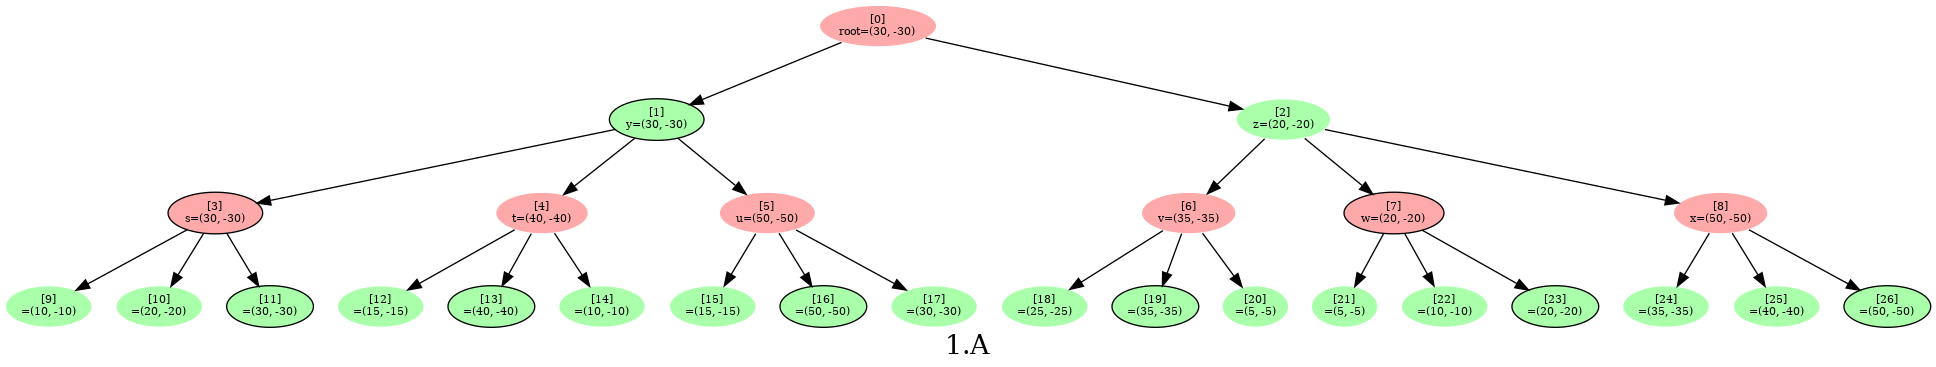

In [120]:
T = MinimaxTree(
    2,
    [
        (10, -10),
        (20, -20),
        (30, -30),
        (15, -15),
        (40, -40),
        (10, -10),
        (15, -15),
        (50, -50),
        (30, -30),
        (25, -25),
        (35, -35),
        (5, -5),
        (5, -5),
        (10, -10),
        (20, -20),
        (35, -35),
        (40, -40),
        (50, -50),
    ],
    [2, 3, 3],
    "1.A",
)
T.minimax()
# T.alpha_beta()
T.label(["root"] + "y,z,s,t,u,v,w,x".split(","))
T.display()